In [1]:
# !pip install chainer

import pandas as pd
import numpy as np

import torch
import torch.nn as nn

from torch import optim
from torch.nn import functional as F

from tqdm import tqdm
from IPython.display import clear_output

import utils
import models

# import os
# os.environ["CUDA_VISIBLE_DEVICES"]="3"

%matplotlib inline

In [2]:
trainloader, validloader, vocab, word2id, id2word = utils.prepare_imdb_dataloaders(path_to_pkl='data/matrix.pkl',
                                                                            forward=False)

Data has been successfully loaded


In [3]:
batch_size = 64
hidden_dim = 256
linear_dim = 256
embedding_dim = 128
vocab_size = len(vocab) + 2
n_layers = 1

model = models.language_model.LanguageModel(hidden_dim, vocab_size, embedding_dim, 
                                            linear_dim, n_layers, train_on_gpu=True)

In [4]:
opt = torch.optim.Adam(model.parameters(), lr=1e-3)

Epoch [16/25], Loss: 3.8285
Validation perplexity:  101.0375195749329


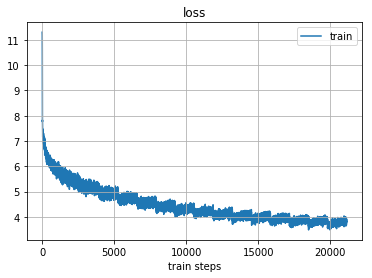

  0%|          | 1/1320 [00:00<02:31,  8.73it/s]

Epoch:  16


100%|██████████| 1320/1320 [02:23<00:00,  9.21it/s]


Desired perplexity has been successfully achieved!


In [5]:
models.language_model.train(model, opt, 25, trainloader, validloader, train_on_gpu=True, path='pretrained_backward.pt', print_every=1)

In [7]:
print('Total perplexity: ', 2**np.mean(models.language_model.eval_epoch(model, validloader, eval_on_gpu=True)))

Total perplexity:  109.97128139078139
